In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-ratings/ratings_Beauty.csv


In [2]:
data = pd.read_csv("/kaggle/input/amazon-ratings/ratings_Beauty.csv")
data.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


# EDA

In [3]:
!pip install -q squarify

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import squarify

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [6]:
data.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data, train_size=0.8)

In [8]:
train_df.shape, test_df.shape

((1618456, 4), (404614, 4))

In [9]:
train_df["UserId"].nunique(), train_df["ProductId"].nunique(), train_df["Rating"].nunique()

(1025135, 226501, 5)

In [10]:
train_df["UserId"].value_counts().sort_values()

UserId
A1QQVWP1RNQJR4      1
AK92XLLM0QX1V       1
AVS085IFKGI6U       1
A1ID7DPOJC8UG4      1
A2CLOZ2YNGHTYT      1
                 ... 
A2V5R832QCSOMX    219
A3LJLRIZL38GG3    225
A3M174IC0VXOS2    258
A281NPSIMI1C2R    267
A3KEZLJ59C1JVH    319
Name: count, Length: 1025135, dtype: int64

In [11]:
train_df["ProductId"].value_counts().sort_values(ascending=False)

ProductId
B001MA0QY2    6053
B0009V1YR8    2299
B0043OYFKU    1979
B0000YUXI0    1703
B003V265QW    1698
              ... 
B00021D5PE       1
B00C8IAJNA       1
B00F48FYC2       1
B004XZEV3A       1
B00CICNFSM       1
Name: count, Length: 226501, dtype: int64

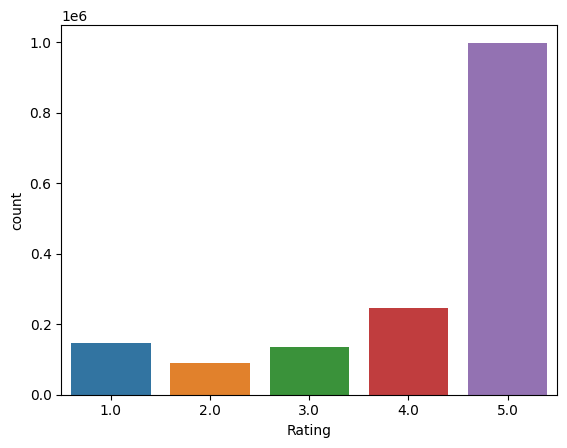

In [12]:
sns.countplot(x=train_df["Rating"]);

In [13]:
average_rating = data.groupby('ProductId')['Rating'].mean().sort_values(ascending=False)

num_ratings = data.groupby('ProductId')['Rating'].count().sort_values(ascending=False)

rating = pd.merge(average_rating, num_ratings, on='ProductId')
rating.columns = ['Average_Rating', 'Number_of_Ratings']

rating

,Average_Rating,Number_of_Ratings
ProductId,,
0205616461,5.0,1
B00551HYQC,5.0,1
B0054ZSIXC,5.0,2
B00550UX52,5.0,2
B00550YQP0,5.0,3
...,...,...
B00586PNN0,1.0,1
B00585I1VW,1.0,1
B005854H5G,1.0,1


<Axes: xlabel='Average_Rating', ylabel='Number_of_Ratings'>

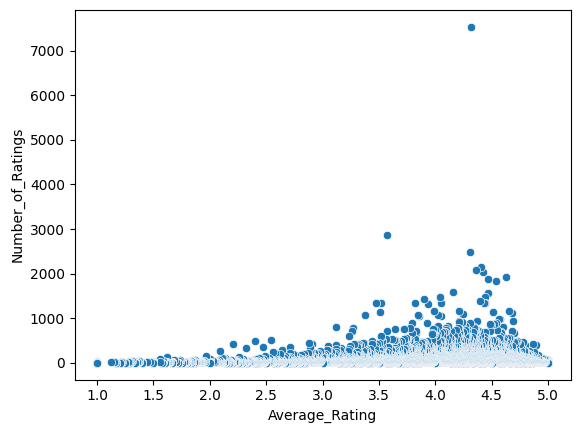

In [14]:
sns.scatterplot(data=rating, x="Average_Rating", y="Number_of_Ratings")

In [15]:
train_df['Datetime'] = pd.to_datetime(train_df['Timestamp'], unit='s')
train_df['Year'] = train_df['Datetime'].dt.year
train_df['Day'] = train_df['Datetime'].dt.day

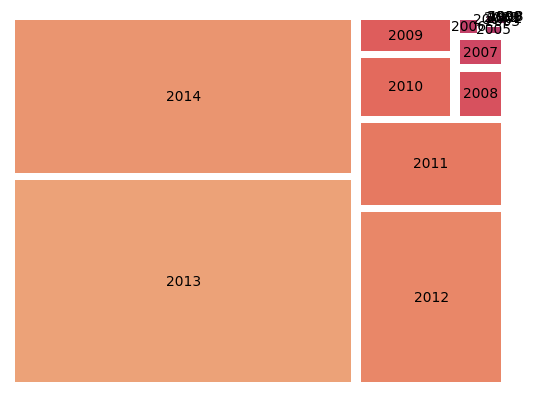

In [16]:
temp = train_df['Year'].value_counts()
squarify.plot(sizes = temp.values, label = temp.index, pad = 1,
                           color = sns.color_palette("flare",len(temp))) 
plt.axis("off");

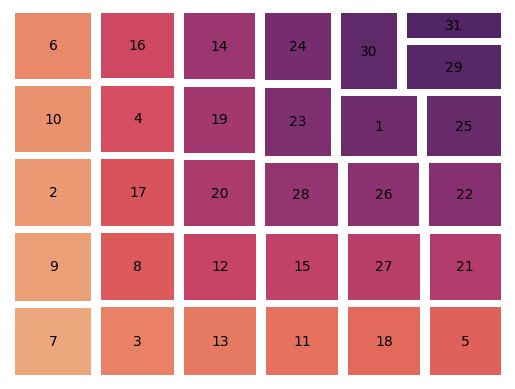

In [17]:
temp = train_df['Day'].value_counts()
squarify.plot(sizes = temp.values, label = temp.index, pad = 1,
                           color = sns.color_palette("flare",len(temp))) 
plt.axis("off");